# Minecraft Newsletter Subscription: Analysis of Player Characteristics

## Introduction

### Relevant background info
Video games today are used not only as a form of entertainment platforms for research, education, and community building. Because these games attract large and diverse audiences, researchers can use them to collect data on human behavior, interaction, and engagement. Minecraft, for example, is a popular sandbox game that has been used in both educational and research settings. Its open-ended gameplay and flexible design make it a good environment for studying how players interact with each other and with the game itself.
Frank Wood and their research team observed the activity of minecraft players. They logged the activity as a data set to be used to predict certain variables, such as subscription. These newsletters help the developers promote their business and economise. They are also used to invite players to take part in surveys or additional studies. However, not all players choose to subscribe, so developers want to know who's most likely subscribe, so they know who to direct the promotional work. Some may not feel invested in the project, while others may not see the benefit of receiving updates. Understanding which players are most likely to subscribe can help researchers improve how they communicate and engage with their audience.
This project focuses on identifying which player behaviors and traits are linked to newsletter subscription. We wanted to know if it was possible to predict whether a player would subscribe based on how they played the game. If players who spend more time on the server or have more experience are also more likely to subscribe, this could help research teams identify which users are more likely to stay involved.


## Key Question: Can experience level, played hours, and age predict whether or not a player is subscribed to newsletters?
 

To make this question more specific and manageable, we focused on three features: a player’s **total playtime**, **experience level**,and  **age**. These features were chosen because they are simple to measure and strongly connected to a player’s level of engagement.

## Code for the description of Dataset

In [13]:
library(dplyr)
library(tidyverse)
library(tidymodels)
library(janitor)
options(repr.matrix.max.rows = 10)

url <- "https://raw.githubusercontent.com/HenryZhou-7/dsci100/main/players.csv"
players <- read.csv(url) |>
    clean_names()
head(players)

,experience,subscribe,hashed_email,played_hours,name,gender,age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [14]:
# Full descriptive summary
# Code for summary statistics
summary(players)
players |>
  summarise(
    total_observations = n(),
    avg_age = mean(age, na.rm = TRUE),
    median_age = median(age, na.rm = TRUE),
    min_age = min(age, na.rm = TRUE),
    max_age = max(age, na.rm = TRUE),
    avg_played_hours = mean(played_hours, na.rm = TRUE),
    median_played_hours = median(played_hours, na.rm = TRUE),
    min_played_hours = min(played_hours, na.rm = TRUE),
    max_played_hours = max(played_hours, na.rm = TRUE)
  )

# Count the experience , subscribe , gender in a table
experience_counts <- players |> count(experience)
subscribe_counts  <- players |> count(subscribe)
gender_counts     <- players |> count(gender)
experience_counts
subscribe_counts
gender_counts

  experience        subscribe       hashed_email        played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

total_observations,avg_age,median_age,min_age,max_age,avg_played_hours,median_played_hours,min_played_hours,max_played_hours
<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
196,20.52062,19,8,50,5.845918,0.1,0,223.1


experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


## Dataset Summary Description
### Variables

| **Variable**     | **Type**        | **Description**                                                                                                               |
|------------------|-----------------|-------------------------------------------------------------------------------------------------------------------------------|
| `experience`     | Character (categorical) |                           |
| `subscribe`      | Logical (TRUE/FALSE)            | Player is subscribed or not                                                            |
| `hashed_email`    | Character       |                                           |
| `played_hours`   | Numeric                         |                                                                                 |
| `name`           | Character                       |                                                                          |
| `gender`         | Character (categorical)  |                                   |
| `age`            | Numeric                         |                                                 |

---

### Summary Statistics
- **Total Observations:** 196
- **age**  
  - Mean: 20.5  
  - Median: 19  
  - Minimum: 8  
  - Maximum: 50  
  - Missing Values: 2  
- **played_hours**  
  - Mean: 5.85  
  - Median: 0.1  
  - Minimum: 0  
  - Maximum: 223.1  

Frequency counts for categorical variables:

- **experience**  
  - Amateur: 63  
  - Pro: 14
  - Regular: 36  
  - Veteran: 48
  - Beginner: 35
  

- **subscribe**  
  - TRUE: 52  
  - FALSE: 144

- **gender**  
  - Male: 124  
  - Female: 37  
  - Non-Binary: 15  
  - Two-Spirited: 6  
  - Prefer not to say: 11  
  - Other: 1
  - Agender: 2

---

### Data Quality & Potential Issues

- **Missing Data:**
  - `age` has 2 missing values.
  - There is a very small chance, but it may be a potential issue.
  
- **Outliers and Skew:**
  - `played_hours` is skewed with a median of 0.1 and a max of over 200 hours. This may indicate outliers in the dataset.
  
- **Categorical Variable Definitions:**
  - `experience` has multiple categories. The specific criteria for each level are not defined in the dataset, so interpretation may be subjective.
  - `gender` has multiple categories.  

- **Data Collection Method:**
  - Not explicitly stated. It appears to be survey-based. This could introduce biases (e.g. self-selection).

- **Small Sample Size:**
  - 196 observations may not be sufficient for broad generalizations.

---

## Methods and Results

1. Above, we have already loaded the data with read_csv and clean_names

In [15]:
players_numeric <- players |>
    mutate(experience_numeric = case_when(
        experience == "Beginner" ~ 1,
        experience == "Amateur" ~ 2,
        experience == "Regular" ~ 3,
        experience == "Veteran" ~ 4,
        experience == "Pro" ~ 5,
        TRUE ~ NA_real_)) |>
        drop_na() |>
        mutate(subscribe = as_factor(subscribe)) |>
        select(subscribe, played_hours, experience_numeric,age)
head(players_numeric)

,subscribe,played_hours,experience_numeric,age
,<fct>,<dbl>,<dbl>,<int>
1,TRUE,30.3,5,9
2,TRUE,3.8,4,17
3,FALSE,0.0,4,17
4,TRUE,0.7,2,21
5,TRUE,0.1,3,21
6,TRUE,0.0,2,17


Here, the code did some data wrangling: we converted the experience levels to numeric values and changed the "subscribe" column to represent a factor.

### Summary of the data set that is relevant for exploratory data analysis related to the planned analysis

In [16]:
summary(players_numeric)

players_numeric |>
  group_by(subscribe) |>
  summarise(
    avg_hours = mean(played_hours),
    avg_age = mean(age),
    avg_experience = mean(experience_numeric),
    count = n()
  )


 subscribe    played_hours     experience_numeric      age       
 FALSE: 52   Min.   :  0.000   Min.   :1.000      Min.   : 8.00  
 TRUE :142   1st Qu.:  0.000   1st Qu.:2.000      1st Qu.:17.00  
             Median :  0.100   Median :2.000      Median :19.00  
             Mean   :  5.905   Mean   :2.696      Mean   :20.52  
             3rd Qu.:  0.600   3rd Qu.:4.000      3rd Qu.:22.00  
             Max.   :223.100   Max.   :5.000      Max.   :50.00  

subscribe,avg_hours,avg_age,avg_experience,count
<fct>,<dbl>,<dbl>,<dbl>,<int>
FALSE,0.5019231,22.98077,2.788462,52
TRUE,7.8830986,19.61972,2.661972,142


This table shows that subscribed players, on average, have a higher playtime than those who aren't subscribed to the newsletter. This suggests that players who are subscribed have a higher level of engagement with the game. Furthermore, compared to non-subscribers, subscribed players seem to be older, but the experience level seem to stay relatively similar between the two groups, suggesting that experience level alone doesn't dictate their playtime. (This becomes more apparent later too)

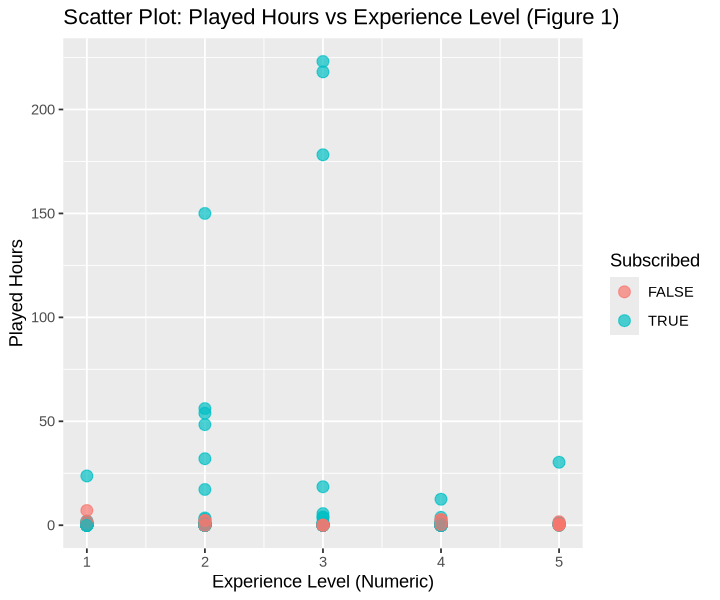

In [17]:
ggplot(players_numeric, aes(x = experience_numeric, y = played_hours, color = subscribe)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(
    title = "Scatter Plot: Played Hours vs Experience Level (Figure 1)",
    x = "Experience Level (Numeric)",
    y = "Played Hours",
    color = "Subscribed"
  )

This scatterplot shows the relationship between players' played hours and experience level, focusing on whether or not they are subscribed to the newsletter or not. From this plot, we can see that subscribed players, in blue, generally have a higher playtime across every experience level. On the other hand, non-subscribed players, in red, are consistently low playtime players. A scatterplot was used for the initial hypothesis plot, as it's easier to observe potential patterns and variations.

**This suggests that whether or not they are subscribed to the newsletter may be a good indicator of play time, rather than experience level.**

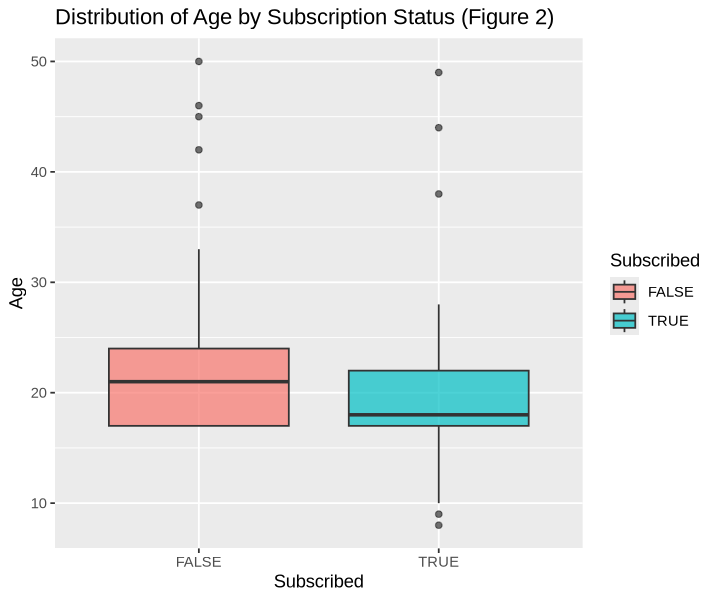

In [18]:
ggplot(players_numeric, aes(x = subscribe, y = age, fill = subscribe)) +
  geom_boxplot(alpha = 0.7) +
  labs(
    title = "Distribution of Age by Subscription Status (Figure 2)",
    x = "Subscribed",
    y = "Age",
    fill = "Subscribed"
  )

Above is a boxplot, which shows the age distribution between subscribers and non-subscribers. From this, we can see that on average, subscribers tend to be younger, though both groups seem to hover around the same age ranges. However, the subscribers had a lower median age, as well as a lower interquartile range, suggesting that a highe rproportion of subscribers are in the late teens. From these observations, we can assume that younger players are more likely to subscribe to the newsletter than older players. A boxplot was used in this situation as it allows us to effectively summarize the distribution of the age, which is the continuous variable.

**Hypothesis**: Based on these graphs, players who are subscribed to the newsletter tend to be more engaged, as shown by higher played hours across all experience levels, and are also generally younger than non-subscribers. Therefore, played hours and age may be good predictors of newsletter subscription, while experience level appears to be less informative.

In [19]:
players_numeric_recipe <- recipe(subscribe ~ played_hours + experience_numeric + age, data = players_numeric) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

players_numeric_scaled <- players_numeric_recipe |> 
    prep() |> 
    bake(players_numeric)

players_numeric_scaled

played_hours,experience_numeric,age,subscribe
<dbl>,<dbl>,<dbl>,<fct>
0.85603962,1.8959148,-1.86578776,TRUE
-0.07385234,1.0730793,-0.57017138,TRUE
-0.20719534,1.0730793,-0.57017138,FALSE
-0.18263216,-0.5725917,0.07763681,TRUE
-0.20368631,0.2502438,0.07763681,TRUE
⋮,⋮,⋮,⋮
-0.2071953,-0.5725917,-0.08431524,TRUE
-0.2071953,-0.5725917,-0.57017138,TRUE
-0.1966683,1.0730793,0.23958885,FALSE


This code performs data wrangling by defining a recipe that standardizes the predictors played_hours, experience_numeric, and age through centering and scaling.

In [20]:
set.seed(2000) 
players_split <- initial_split(players_numeric, prop = 0.8)
players_training <- training(players_split) 
players_testing <- testing(players_split) 

players_training
players_testing

subscribe,played_hours,experience_numeric,age
<fct>,<dbl>,<dbl>,<int>
TRUE,0.0,1,17
TRUE,2.0,1,27
TRUE,0.4,2,17
FALSE,0.1,4,18
FALSE,0.9,2,18
⋮,⋮,⋮,⋮
TRUE,0.0,5,25
TRUE,0.1,2,17
FALSE,0.0,1,42


subscribe,played_hours,experience_numeric,age
<fct>,<dbl>,<dbl>,<int>
TRUE,0.2,2,22
TRUE,0.5,2,17
TRUE,0.6,3,19
FALSE,0.1,2,17
TRUE,0.7,2,21
⋮,⋮,⋮,⋮
FALSE,0.3,1,17
FALSE,2.1,2,24
TRUE,32.0,2,22


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
9,accuracy,binary,0.7435887,5,0.03006253,Preprocessor1_Model05


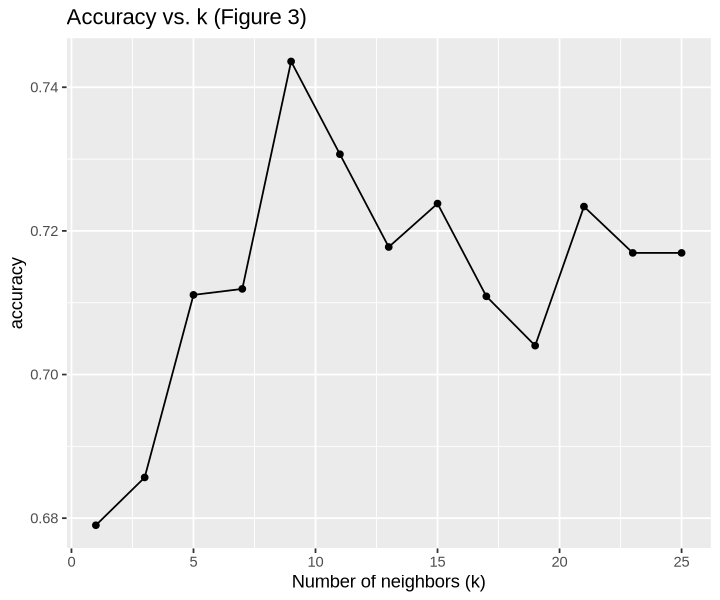

In [21]:
set.seed(2000) 
options(repr.plot.height = 5, repr.plot.width = 6)

knn_recipe <- recipe(subscribe ~ played_hours + experience_numeric + age, data = players_training) |> 
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

train_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

knn_grid <- tibble(neighbors = seq(1, 25, by = 2))


knn_results <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = train_vfold, grid = knn_grid) |>
    collect_metrics()

accuracy <- knn_results |>
    filter(.metric == "accuracy") |>
    mutate(neighbors = as.numeric(neighbors), mean = as.numeric(mean)) |>
    drop_na()

cross_val_plot <- ggplot(accuracy, aes(x = neighbors, y = mean)) +
                    geom_point() +
                    geom_line() + 
                    xlab("Number of neighbors (k)") + 
                    ylab("accuracy") +
                    ggtitle("Accuracy vs. k (Figure 3)")
                 
cross_val_plot
best_k <- accuracy |>
  arrange(desc(mean)) |>
  slice(1)
best_k

In [22]:
set.seed(2000) 
knn_spec_new <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k$neighbors) |>
      set_engine("kknn") |>
      set_mode("classification")

players_fit <- workflow() |>
         add_model(knn_spec_new) |>
         add_recipe(knn_recipe) |>
         fit(data = players_training)

The previous few code cells show how the data was prepared for modelling. First, we created recipe which standardizes the predictors *(played_hours, experience_numeric, age)*, using scaling and centering. This makes sure that all the predictors are on the same scale, to prevent biases. Then, this recipe is applied to the full dataset to create a scaled version of the data, which is then split into a training and testing set (splitting) using a 80/20 split, where players_training has 80% of the data for training the model, and players_testing has 20% of the data for evaluating.

In [23]:
players_predictions <- predict(players_fit, players_testing) |>
    bind_cols(players_testing)

players_metrics <- players_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")

players_conf_mat <- players_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)

players_conf_mat
players_metrics

          Truth
Prediction FALSE TRUE
     FALSE     2    6
     TRUE      7   24

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6666667


This confusion matrix and accuracy score shows the performance of this classification model. Out of all 3 predictors, we can see that the model correctly identified 2 true negatives (non-subscribers), and 24 true positives (subscribers), but incorrectly classified 7 false positives, and 6 false negatives. With this knowledge, this model had an accuracy of 66.67%, which shows that this model is accurate for around two thirds of the test cases.

In [24]:
knn_recipe2 <- recipe(subscribe ~ played_hours +  age, data = players_training) |> 
    step_scale(all_predictors()) |>
    step_center(all_predictors())
#------------------

knn_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

train_vfold2 <- vfold_cv(players_training, v = 5, strata = subscribe)

knn_grid2 <- tibble(neighbors = seq(1, 25, by = 2))

knn_results2 <- workflow() |>
    add_recipe(knn_recipe2) |>
    add_model(knn_spec2) |>
    tune_grid(resamples = train_vfold2, grid = knn_grid2) |>
    collect_metrics()

accuracy <- knn_results2 |>
    filter(.metric == "accuracy") |>
    mutate(neighbors = as.numeric(neighbors), mean = as.numeric(mean)) |>
    drop_na()

best_k_2 <- accuracy |>
  arrange(desc(mean)) |>
  slice(1)
best_k_2

knn_spec_new2 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_2$neighbors) |>
      set_engine("kknn") |>
      set_mode("classification")

#------------------------------
players_fit <- workflow() |>
         add_model(knn_spec_new2) |>
         add_recipe(knn_recipe2) |>
         fit(data = players_training)
players_predictions <- predict(players_fit, players_testing) |>
    bind_cols(players_testing)

players_metrics <- players_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")
players_metrics

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,accuracy,binary,0.7433737,5,0.03036473,Preprocessor1_Model06


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7948718


The code above describes what would happen if we removed experience level from the K-NN  prediction. This addresses our initial thought that **experience level** may not be a good indicator of subscription.

## Discussion

### Summary of findings
In our analysis, we investigated which player characteristics are most predictive of subscribing to a game-related newsletter. Using dataset players.csv, we performed a series of data wrangling, cleaning and exploratory data analysis. We decided on using played_hours, age, and experience level as predictors for subscription. The data set was split 80/20 for training and testing respectively. The best k value found was 9 neighbours with experience level and 11 without. We then used this number to build the classification model. Our key findings were that the model had a 66.66% accuracy when using the described predictors and that the accuracy increased to 79% when experience level was omitted.


### Was the findings expected?
Our findings were somewhat consistent with our initial expectations. From the graphs we made during our individual portion, it did not seem that the variables had a significant correlation with each other, thus we were expecting an accuracy score of a lower percentage. The model's accuracy was 66.66%, which is not the highest accuracy percentage, but it did indicate that played_hours, age, and experience level are a reasonably good start as predictors for subscription. The increase in accuracy to 79% when experience level was omitted suggests that this variable was introducing noise to the classification model rather than useful information. These results support our initial hypothesis that player engagement (played hours) and age are more informative predictors of subscription than experience level.

### Impacts of findings
The implications of our findings could be useful for game developers and marketers so they know to whom they should promote their newsletters. As shown above, played_hours and age are stronger predictors of newsletter subscription compared to the rest of the variables. This helps developers understand how to tailor their marketing strategies to target players more effectively. For instance, developers can create personalized content and offers based on the age group that is most likely to subscribe. This could potentially increase engagement and subscription rates, which would overall benefit the company. 



### Future Questions
Our analysis opens various paths for future research. One question that could be posed is whether other player characteristics, such as in-game achievements or social interactions when playing, could improve the predictive model's accuracy for newsletter subscriptions. Going further into this research could provide deeper insight into the behaviours of the players and their preferences, which would increase engagement with the game, therefore increasing the revenue. Also, exploring the impact of different game genres/mods could help marketers strategize how to format their newsletter and promotional ads. These questions underscore the proceeding need for research (from the game owners' perspective) on player behaviour and how their information can be used to benefit their experience and the developers. However, this also raises ethical questions regarding the extent of data collection. Is it morally right and ethically safe to be surveying these players so much that it is borderline stalking? Ensuring that the data collection practices respect player privacy and consent is crucial; this is just as important as the predictive analysis that developers use for newsletters. Future research should also focus on establishing ethical guidelines for data collection so that they can balance the benefits of personalized marketing with the rights and privacy of players in mind.
